# Fundamentals of Information Systems

## Python Programming (for Data Science)

### Master's Degree in Data Science

#### Giorgio Maria Di Nunzio
#### (Courtesy of Gabriele Tolomei FIS 2018-2019)
<a href="mailto:giorgiomaria.dinunzio@unipd.it">giorgiomaria.dinunzio@unipd.it</a><br/>
University of Padua, Italy<br/>
2021/2021<br/>

# Lecture 12: The Regression Problem - Example (Part 1)

## Instructions

-  We consider the dataset available at this [link](http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data), provided by the [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)

-  The dataset comes with a [**README**](http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names) file, which contains information about the number of instances, the number and type of attributes, as well as the prediction goal.

-  To be able to work even without any network connection, I have stored both the dataset and README files locally on my machine.

-  "The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

## Additional Notes

-  The original file contains a mixture of whitespace and tab-separated fields. In order to transform it into a legitimate tab-separated file, I had to run the following shell commands:

```bash
> TAB=$(printf '\t')
> sed "s/ \{2,\}/$TAB/g" < ${ORIGINAL_DATASET_FILE} > ${NEW_DATASET_FILE}
```

-  The commands above use <code>**sed**</code> to replace **2 or more** whitespaces with a tab character on **every line** of the original dataset file.

-  Linux and Mac OS X systems have <code>**sed**</code> natively installed. Windows users can install it from [here](http://gnuwin32.sourceforge.net/packages/sed.htm) 

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import stats module from scipy, which contains a large number 
# of probability distributions as well as an exhaustive library of statistical functions.
import scipy.stats as stats

%matplotlib inline

# 1. Data Collection

In [2]:
# Path to the local dataset file
DATASET_PATH = "./data/auto-mpg-regression/dataset.tsv"

In [4]:
# Load the dataset with Pandas
data = pd.read_csv(DATASET_PATH, sep="\t")
print("Shape of the dataset: {}".format(data.shape))
data.head()
# NOTE: the first line of the file is considered as the header

Shape of the dataset: (397, 9)


,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [5]:
# Load the dataset with Pandas, this time taking into account
# the fact that there is no header line
data = pd.read_csv(DATASET_PATH, sep="\t", header=None)
print("Shape of the dataset: {}".format(data.shape))
data.head()

Shape of the dataset: (398, 9)


,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
# Column names (labels) are not so meaningful and we should use the attribute names
# provided in the README file
# Row index, instead, can be left as it is (i.e., default IndexRange)
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
           'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv(DATASET_PATH, sep="\t", header=None, names=columns)
print("Shape of the dataset: {}".format(data.shape))
data.head()

Shape of the dataset: (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Checking for any Missing Values

In [7]:
# Check if there is any missing value in the whole dataset
print("There are missing values in the dataset: {}".
     format(data.isnull().any().any()))

There are missing values in the dataset: False


In [8]:
# Check if 'horsepower' has really 6 missing values
print("N. of missing values for attribute 'horsepower': {}".
     format(data.horsepower.isnull().sum()))

N. of missing values for attribute 'horsepower': 0


In [9]:
# Weird... we know from the README file there must be 6 missing values
# How come we are not able to spot those?
# Possibly, because of the way in which NAs are 'encoded' in the file...
# Let's see the set of values contained in the 'horsepower' column
print(sorted(data.horsepower.unique(), reverse=True))

['?', '98.00', '97.00', '96.00', '95.00', '94.00', '93.00', '92.00', '91.00', '90.00', '89.00', '88.00', '87.00', '86.00', '85.00', '84.00', '83.00', '82.00', '81.00', '80.00', '79.00', '78.00', '77.00', '76.00', '75.00', '74.00', '72.00', '71.00', '70.00', '69.00', '68.00', '67.00', '66.00', '65.00', '64.00', '63.00', '62.00', '61.00', '60.00', '58.00', '54.00', '53.00', '52.00', '49.00', '48.00', '46.00', '230.0', '225.0', '220.0', '215.0', '210.0', '208.0', '200.0', '198.0', '193.0', '190.0', '180.0', '175.0', '170.0', '167.0', '165.0', '160.0', '158.0', '155.0', '153.0', '152.0', '150.0', '149.0', '148.0', '145.0', '142.0', '140.0', '139.0', '138.0', '137.0', '135.0', '133.0', '132.0', '130.0', '129.0', '125.0', '122.0', '120.0', '116.0', '115.0', '113.0', '112.0', '110.0', '108.0', '107.0', '105.0', '103.0', '102.0', '100.0']


In [10]:
# Apparently, there are some question mark characters '?' in this column.
# Let's see how many records have '?' in their 'horsepower' column.
# Extract the sub-DataFrame using boolean indexing 
# on the 'horsepower' column and count the corresponding number of matching rows.
print("How many records have 'horsepower=?'?: {}"
      .format(data[data.horsepower == '?'].shape[0]))

How many records have 'horsepower=?'?: 6


In [11]:
data.loc[data.horsepower == "?", :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [12]:
# We have therefore found that '?' is a sentinel value used to identify NAs
# Let's reload the dataset using this value as a marker for NAs.
data = pd.read_csv(DATASET_PATH, sep="\t", header=None, 
                   names=columns,
                  na_values={'horsepower':'?'})

# Alternatively, we could simply replace '?' on the loaded dataset with np.nan
# 1. Using 'loc':
# data.loc[data.horsepower == '?', 'horsepower'] = np.nan
# 2. Using 'replace':
# data.horsepower.replace('?', np.nan, inplace=True)
print("Shape of the dataset: {}".format(data.shape))
data.head()

Shape of the dataset: (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [13]:
# Let's repeat the same check as above on missing values.
# Check if there is any missing value in the whole dataset
print("There are missing values in the dataset: {}".
     format(data.isnull().any().any()))
# Check if 'horsepower' has really 6 missing values
print("N. of missing values for attribute 'horsepower': {}".
     format(data.horsepower.isnull().sum()))

There are missing values in the dataset: True
N. of missing values for attribute 'horsepower': 6


In [14]:
# Let's have a look at the output of the 'describe()' function.
data.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,NaN


In [15]:
print(data["mpg"])

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64


## Change the Column Layout

In [16]:
# Just as a convention, I prefer to place the column to be predicted
# as the last one.
columns = data.columns.tolist()
print("Orignal order of columns:\n{}".format(columns))

# Popping out 'mpg' from the list and insert it back at the end.
columns.insert(len(columns), columns.pop(columns.index('mpg')))

print("New order of columns:\n{}".format(columns))

Orignal order of columns:
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
New order of columns:
['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name', 'mpg']


In [17]:
# Let's refactor the DataFrame using this new column index
data = data.loc[:, columns]
data.head()
# Alternatively to 'loc' we can also use 'reindex()'
# data = data.reindex(columns=columns)
# data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


## Apply Some Simple Data Transformations

In [18]:
# Suppose we want to convert displacement unit from cubic inch to litre
# There is a useful conversion table which tells us how to do that.
# 1 cubic inch = 0.016387064 litre
CI_TO_LITRE = 0.016387064
data.displacement *= CI_TO_LITRE
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,5.030829,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,5.735472,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,5.211086,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,4.981667,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,4.948893,140.0,3449.0,10.5,70,1,ford torino,17.0


# 2. Data Exploration

## 2.1 Analysis of Data Distributions: Continous Values

-  Let's start visualizing the distributions of the **5 continuous-valued** features:
    - <code>**displacement**</code>
    - <code>**horsepower**</code> (contains 6 <code>**NA**</code>s)
    - <code>**weight**</code>
    - <code>**acceleration**</code>

In [19]:
# Create a lambda function which will be applied to each entry
# of the numpy 2-D array of AxesSubplot objects
# x is a reference to an AxesSubplot object
y_labeler = lambda x: x.set_ylabel('density')
# np.vectorize() allows calling the function on each element
y_labeler = np.vectorize(y_labeler)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

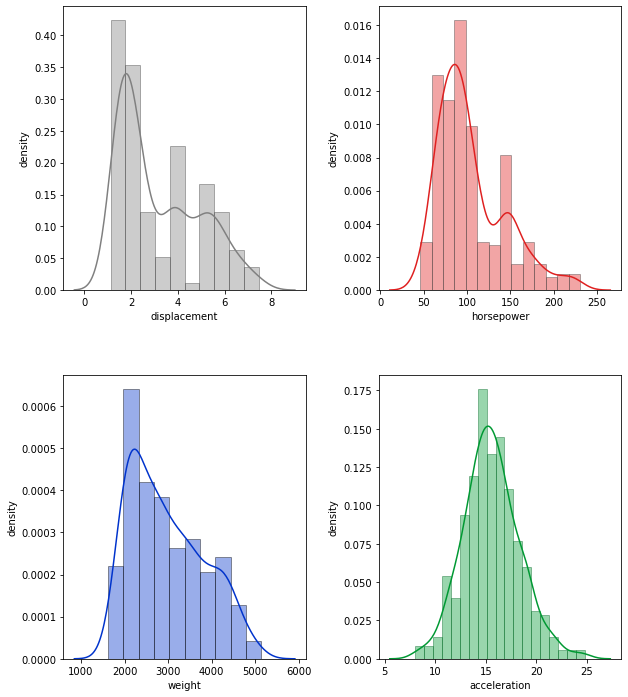

In [21]:
# Create a Figure containing 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(10,12))
# Call the vectorized function for labeling all the y-axes
y_labeler(axes)

# Plot 'displacement' on the top-left subplot
sns.distplot(data.displacement, color='#808080', ax=axes[0,0], 
                 hist_kws=dict(edgecolor="#404040", linewidth=1))

# Plot 'horsepower' (limited only to non-NA values) on the top-right subplot
sns.distplot(data.loc[data.horsepower.notnull(), 'horsepower'], 
                 color='#df2020', ax=axes[0,1], 
                 hist_kws=dict(edgecolor="#404040", linewidth=1))

# Plot 'weight' on the bottom-left subplot
sns.distplot(data.weight, color='#0033cc', ax=axes[1,0], 
                 hist_kws=dict(edgecolor="k", linewidth=1))

# Plot 'acceleration' on the bottom-right subplot
sns.distplot(data.acceleration, color='#009933', ax=axes[1,1],
                 hist_kws=dict(edgecolor="#006622", linewidth=1))

# Adjust space between plots
plt.subplots_adjust(wspace=.3, hspace=.3)

## Additional Note on Binning

-  If we don't specify the number of **bins** as argument of <code>**sns.distplot**</code> function (i.e.,<code>**bins=None**</code>) the **Freedman-Diaconis** rule is used to devise the _best_ number of bins.

-  This rule starts from defining the **width** each bin should have on the basis of the range of values observed, as follows:

$$
\texttt{bin}\_\texttt{width} = 2 * \frac{\texttt{IQR}}{n^{1/3}}
$$
where $\texttt{IQR}$ stands for **interquartile range**, namely the length of the interval delimited by the 1st and the 3rd quartile, and $n$ is the **number of observations**.

-  Finally, the number of bins is computed as:

$$
\texttt{bins} = (max−min)/\texttt{bin}\_\texttt{width}
$$

where, $max$ ($min$) is the **maximum** (**minimum**) value observed.


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/si

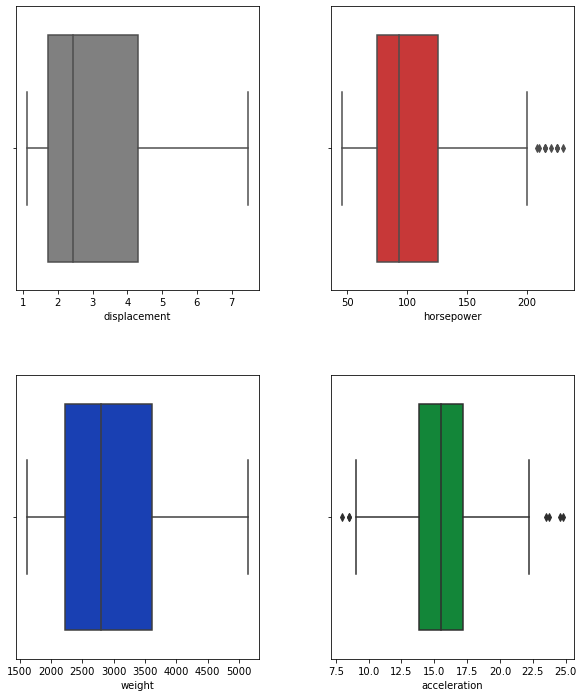

In [22]:
# Let's produce the boxplots corresponding to the distribution plots above
# Create a Figure containing 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(10,12))

sns.boxplot(data.displacement, color='#808080', ax=axes[0,0])
sns.boxplot(data.loc[data.horsepower.notnull(), 'horsepower'], 
                color='#df2020', ax=axes[0,1])
sns.boxplot(data.weight, color='#0033cc', ax=axes[1,0])
sns.boxplot(data.acceleration, color='#009933', ax=axes[1,1])
plt.subplots_adjust(wspace=.3, hspace=.3)

## Spotting Outliers

-  Generally speaking, an outlier is an observation that is numerically distant from the rest of the data. 

-  Boxplots are useful to actually spot any possible **outlier**, as they show the distribution of values that are located within the $\texttt{IQR}$ (i.e., any data point between the 1st and 3rd quartile).

-  A boxplot defines also 2 other values, called **fences** or **whiskers** which are used to define outliers (i.e., any data point that is located outside the fences).

-  Usually, fences are determined as follows: if $Q_1$ and $Q_3$ represents the 1st and 3rd quartile, respectively, we define $F_\textrm{left}$ and $F_\textrm{right}$ as the left and right fence point, respectively, so that:

$$
F_\textrm{left} = Q_1 - 1.5 * \texttt{IQR};~~F_\textrm{right} = Q_3 + 1.5 * \texttt{IQR}
$$

## Few Observations from the Plots

-  <code>**displacement**</code> distribution is not uni-modal at all; in fact it is bi-, or possibly, tri-modal. Apparently, this is not affected by any outlier.

-  <code>**horsepower**</code> distribution is also not uni-modal, with a small bump around the value of 150Hp. However, here we can spot some possible outliers (i.e., large values over 200Hp).

-  <code>**weight**</code> distribution is uni-modal yet **right-skewed** (**positively skewed**), which means the mean is shifted to the right due to the presence of some large values towards the positive direction (not necessarily outliers).

-  <code>**acceleration**</code> essentially fits nicely to a **Normal** (**Gaussian**) **distribution** and contains some outliers.

In [23]:
# Check how many outliers we have
# 1. 'horsepower'
hp_q1, hp_q3 = data.loc[data.horsepower.notnull(), 'horsepower'].quantile([.25, .75])
print("1st Quartile of 'horsepower': {:.2f}".
      format(hp_q1))
print("3rd Quartile of 'horsepower': {:.2f}".
      format(hp_q3))
hp_IQR = (hp_q3 - hp_q1)
print("IQR of 'horsepower': {:.2f}".
      format(hp_IQR))
hp_fence_left = hp_q1 - 1.5 * hp_IQR
hp_fence_right = hp_q3 + 1.5 * hp_IQR
print("Fence range: [{:.2f}, {:.2f}]".
      format(hp_fence_left, hp_fence_right))

1st Quartile of 'horsepower': 75.00
3rd Quartile of 'horsepower': 126.00
IQR of 'horsepower': 51.00
Fence range: [-1.50, 202.50]


In [24]:
print("N. of instances containing outlier of 'horsepower': {}".
      format(data[data.horsepower > hp_fence_right].shape[0]))

N. of instances containing outlier of 'horsepower': 10


In [25]:
# Check how many outliers we have
# 2. 'acceleration'
acc_q1, acc_q3 = data['acceleration'].quantile([.25, .75])
print("1st Quartile of 'acceleration': {:.2f}".
      format(acc_q1))
print("3rd Quartile of 'acceleration': {:.2f}".
      format(acc_q3))
acc_IQR = (acc_q3 - acc_q1)
print("IQR of 'acceleration': {:.2f}".
      format(hp_IQR))
acc_fence_left = acc_q1 - 1.5 * acc_IQR
acc_fence_right = acc_q3 + 1.5 * acc_IQR
print("Fence range: [{:.2f}, {:.2f}]".
      format(acc_fence_left, acc_fence_right))

1st Quartile of 'acceleration': 13.83
3rd Quartile of 'acceleration': 17.18
IQR of 'acceleration': 51.00
Fence range: [8.80, 22.20]


In [26]:
print("N. of instances containing outlier of 'horsepower' or 'acceleration': {}".
      format(data[(data.acceleration < acc_fence_left) | 
                  (data.acceleration > acc_fence_right)].shape[0]))

N. of instances containing outlier of 'horsepower' or 'acceleration': 7


In [27]:
print("N. of instances containing outlier of 'acceleration': {}".
      format(data[(data.horsepower > hp_fence_right) |
                  (data.acceleration > acc_fence_right) |
                  (data.acceleration < acc_fence_left)].shape[0]))

N. of instances containing outlier of 'acceleration': 16


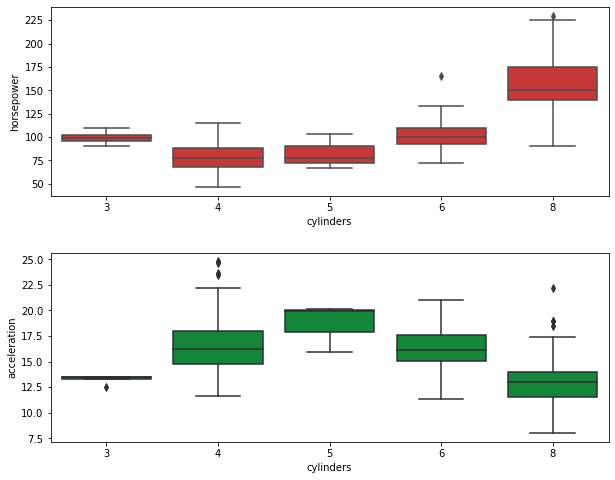

In [28]:
# Let's see if we can spot where those outliers are located
# w.r.t. other features (e.g., cylinders)
fig, axes = plt.subplots(2, 1, figsize=(10,8))

sns.boxplot(x=data.cylinders, y=data.loc[data.horsepower.notnull(), 'horsepower'], 
                color='#df2020', ax=axes[0])
sns.boxplot(x=data.cylinders, y=data.acceleration, color='#009933', ax=axes[1])
plt.subplots_adjust(wspace=.3, hspace=.3)

## Other Few Observations from the Plots

-  <code>**horsepower**</code>: outliers seem to occur only on 6- and 8-cylinder vehicles, stronger in the former.

-  <code>**acceleration**</code>: outliers here are more evenly distributed over 3- 4- and 8-cylinder vehicles.

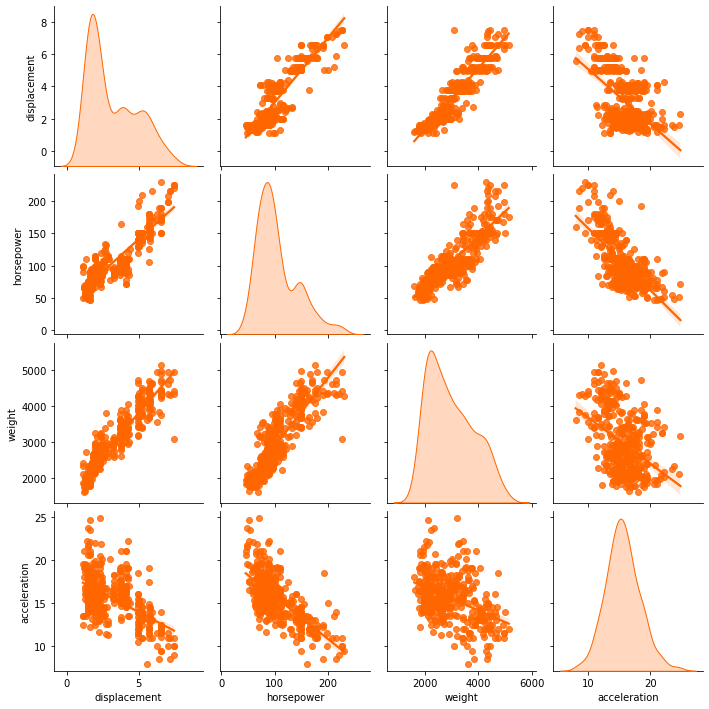

In [29]:
# Let's now plot the pairwise relationship between our continuous-valued features
sns.pairplot(data.loc[data.horsepower.notnull(),
                          ['displacement', 'horsepower', 'weight', 
                           'acceleration']],
                 kind="reg",
                 diag_kind='kde', 
                 diag_kws={'shade': True, 'color': '#ff6600'}, 
                 plot_kws={'color': '#ff6600'})

## How Continuous-valued Features Relate to Each Other

-  As <code>**displacement**</code> increases, so do <code>**weight**</code> and <code>**horsepower**</code>; also <code>**acceleration**</code> tends to decrease (pretty intuitive!).

-  As <code>**horsepower**</code> increases, <code>**acceleration**</code> decreases, whilst <code>**weight**</code> and <code>**displacement**</code> increase as well.

-  As <code>**weight**</code> increases, both <code>**horsepower**</code> and <code>**displacement**</code> increases but <code>**acceleration**</code> tends to decrease. Now, this might seem counterintuitive at first but the thing is that there might be a **latent factor** which affects this relationship (e.g., a heavy vehicle is also likely to have more horsepower and therefore this could be the actual reason why we observe such a phenomenon).

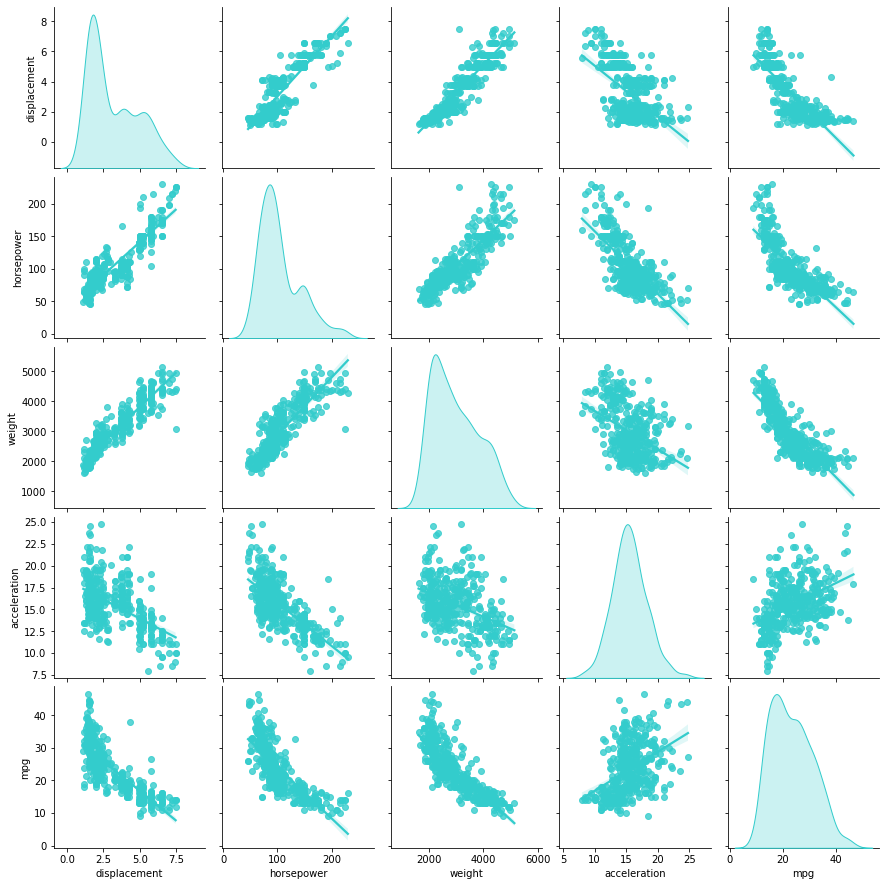

In [30]:
# Let's now plot the pairwise relationship between our continuous-valued features 
# this time also considering our target variable 'mpg'
sns.pairplot(data.loc[data.horsepower.notnull(),
                          ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg']],
                 kind="reg",
                 diag_kind='kde', 
                 diag_kws={'shade': True, 'color': '#33cccc'}, 
                 plot_kws={'color': '#33cccc'})

## 2.1 Analysis of Data Distributions: Categorical Values

-  Let's visualize the distributions of the **3 categorical** features:
    - <code>**cylinders**</code>
    - <code>**model_year**</code>
    - <code>**origin**</code>

In [31]:
# Let's see the frequency counts of each categorical variable
# 'cylinders'
print(data.cylinders.value_counts())
print()
# 'model_year'
print(data.model_year.value_counts())
print()
# 'origin'
print(data.origin.value_counts())

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model_year, dtype: int64

1    249
3     79
2     70
Name: origin, dtype: int64


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


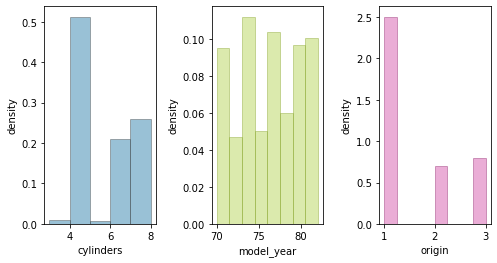

In [32]:
# Let's produce the boxplots corresponding to the distribution plots above
# Create a Figure containing 2x2 subplots
fig, axes = plt.subplots(1, 3, figsize=(8,4))
y_labeler(axes)

# Plot 'cylinders'
sns.distplot(data.cylinders, color='#006699', ax=axes[0], 
                 kde=False, norm_hist=True,
                 hist_kws=dict(edgecolor="#404040", linewidth=1))
# Plot 'model_year'
sns.distplot(data.model_year, color='#a6cc33', ax=axes[1], 
                 kde=False, norm_hist=True,
                 hist_kws=dict(edgecolor="#85a329", linewidth=1))
# Plot 'origin'
sns.distplot(data.origin, color='#cc3399', ax=axes[2], 
                 kde=False, norm_hist=True,
                 hist_kws=dict(edgecolor="#8f246b", linewidth=1))
# Adjust space between plots
plt.subplots_adjust(wspace=.5, hspace=.4)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


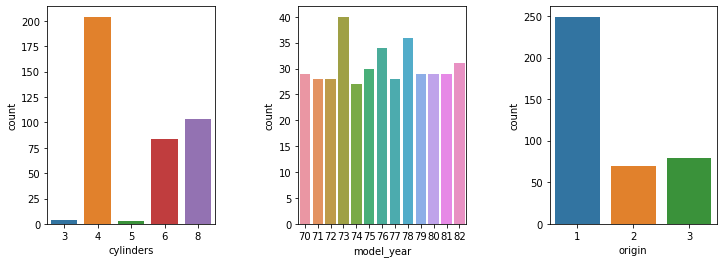

In [33]:
# For categorical variables, 'countplot' is the way to go
# Create a Figure containing 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(12,4))

# Plot 'cylinders'
sns.countplot(data.cylinders, ax=axes[0])
sns.countplot(data.model_year, ax=axes[1])
sns.countplot(data.origin, ax=axes[2])
plt.subplots_adjust(wspace=.5, hspace=.4)

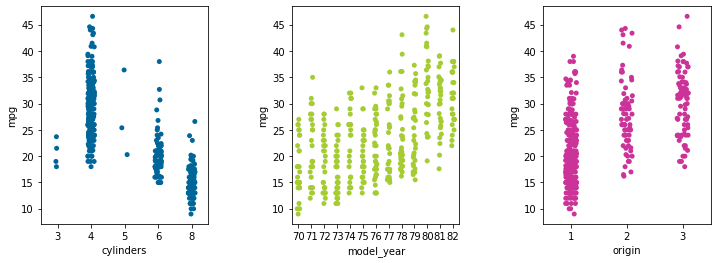

In [34]:
# stripplot is also another useful plot to relate categorical vs. target variable
# Create a Figure containing 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(12,4))

sns.stripplot(x=data.cylinders, y=data.mpg, color='#006699', ax=axes[0])
sns.stripplot(x=data.model_year, y=data.mpg, color='#a6cc33', ax=axes[1])
sns.stripplot(x=data.origin, y=data.mpg, color='#cc3399', ax=axes[2])

plt.subplots_adjust(wspace=.5, hspace=.3)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 38.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points 

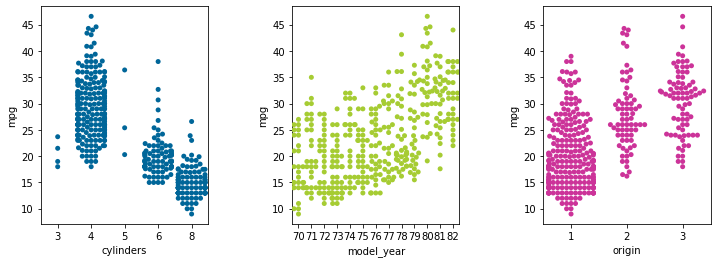

In [35]:
# swarmplot is also another useful plot to relate categorical vs. target variable
# Create a Figure containing 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(12,4))

sns.swarmplot(x=data.cylinders, y=data.mpg, color='#006699', ax=axes[0])
sns.swarmplot(x=data.model_year, y=data.mpg, color='#a6cc33', ax=axes[1])
sns.swarmplot(x=data.origin, y=data.mpg, color='#cc3399', ax=axes[2])

plt.subplots_adjust(wspace=.5, hspace=.3)

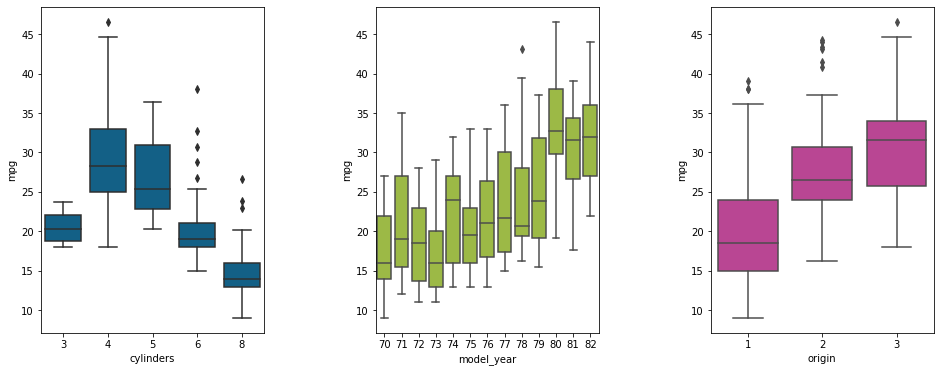

In [36]:
# boxplot is also another useful plot to relate categorical vs. target variable
# Create a Figure containing 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(16,6))

sns.boxplot(x=data.cylinders, y=data.mpg, color='#006699', ax=axes[0])
sns.boxplot(x=data.model_year, y=data.mpg, color='#a6cc33', ax=axes[1])
sns.boxplot(x=data.origin, y=data.mpg, color='#cc3399', ax=axes[2])

plt.subplots_adjust(wspace=.5, hspace=.3)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 30.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points 

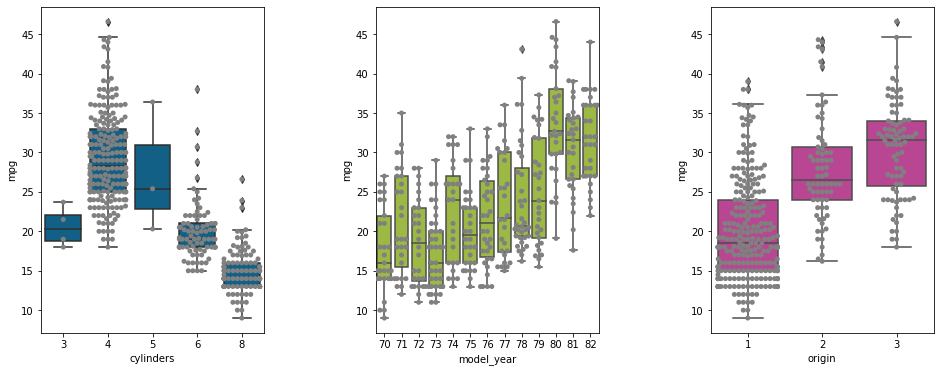

In [37]:
# Let's overlay boxplot and swarmplot
# Create a Figure containing 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(16,6))

sns.boxplot(x=data.cylinders, y=data.mpg, color='#006699', ax=axes[0])
sns.swarmplot(x=data.cylinders, y=data.mpg, color=".5", ax=axes[0])
sns.boxplot(x=data.model_year, y=data.mpg, color='#a6cc33', ax=axes[1])
sns.swarmplot(x=data.model_year, y=data.mpg, color=".5", ax=axes[1])
sns.boxplot(x=data.origin, y=data.mpg, color='#cc3399', ax=axes[2])
sns.swarmplot(x=data.origin, y=data.mpg, color=".5", ax=axes[2])

plt.subplots_adjust(wspace=.5, hspace=.3)

# 3. Data Preprocessing (Munging)

## Summary of the Issues

-  From our exploratory data analysis above, **two** main issues are observed:
    1. The presence of **6 missing values** for the attribute <code>**horsepower**</code>
    2. The presence of a total of **18 outliers** on the attributes <code>**horsepower**</code> and <code>**acceleration**</code>
-  In addition to those, we should also consider how to properly handle different feature's scale as well as the fact that we are in presence of both continuous and categorical attributes.

## 3.1 Handling Missing Values (NA)

-  There are just **6 out of 398** (i.e., approximately **1.5%**) of records containing a missing value.

-  Since they do not represent a significant subset of the whole dataset, we can simply drop those records.

-  Otherwise, we could mark (i.e., replace) those missing value using one of the strategies discussed (e.g., replace them with the median as computed from observed values).

In [38]:
# Let's go for the second option, i.e., replacing missing values on 'horsepower'
# using the median as computed from the other observations.
# NOTE: here's a classical example where using the mean rather than the median
# might affect the result, as the mean is more sensitive to outliers.
# NOTE: by default, median() does not include NAs in the computation.
# In other words, we don't need to explicitly tell pandas to work on non-NA values:
# data.horsepower[data.horsepower.notnull()].median()
data.horsepower.fillna(data.horsepower.median(), inplace=True)
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,5.030829,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,5.735472,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,5.211086,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,4.981667,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,4.948893,140.0,3449.0,10.5,70,1,ford torino,17.0


In [39]:
data.describe(include='all')

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398,398.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
mean,5.454774,3.169682,104.304020,2970.424623,15.568090,76.010050,1.572864,NaN,23.514573
std,1.701004,1.708677,38.222625,846.841774,2.757689,3.697627,0.802055,NaN,7.815984
min,3.000000,1.114320,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN,9.000000
25%,4.000000,1.708351,76.000000,2223.750000,13.825000,73.000000,1.000000,NaN,17.500000
50%,4.000000,2.433479,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN,23.000000
75%,8.000000,4.293411,125.000000,3608.000000,17.175000,79.000000,2.000000,NaN,29.000000


## 3.2 Handling Outliers

-  There are **18 outliers** shared between <code>**horsepower**</code> and <code>**acceleration**</code>.

-  Like missing values, outliers can be simply discarded as well (i.e., a process which is also known as **trimming** or **truncation**).

-  Another approach is called **winsorizing** and consists of replacing outliers with a specified percentile of the data (e.g., a 90% winsorization would see all data below the 5th percentile set to the 5th percentile, and data above the 95th percentile set to the 95th percentile).

In [40]:
# Python can winsorize data using 'scipy.stats' module.
# Example:
a = pd.Series([92, 19, 101, 58, 1053, 91, 26, 78, 10, 13, -40, 101, 86, 85, 15, 89, 89, 28, -5, 41])
print("Length of a: {}".format(a.shape[0]))
print("Mean of a: {}".format(a.mean()))
print("Median of a: {}".format(a.median()))
print("Sorted a: {}".format(np.sort(a)))
q_005, q_95 = a.quantile([0.05, 0.95])
print("5th percentile of a: {:.2f}".format(q_005))
print("95th percentile of a: {:.2f}".format(q_95))
stats.mstats.winsorize(a, limits=0.05, inplace=True)
print("Sorted a: {}".format(np.sort(a)))

Length of a: 20
Mean of a: 101.5
Median of a: 68.0
Sorted a: [ -40   -5   10   13   15   19   26   28   41   58   78   85   86   89
   89   91   92  101  101 1053]
5th percentile of a: -6.75
95th percentile of a: 148.60
Sorted a: [ -5  -5  10  13  15  19  26  28  41  58  78  85  86  89  89  91  92 101
 101 101]


In [41]:
# Let's winsorize 'horsepower' and 'acceleration'
stats.mstats.winsorize(data.horsepower, limits=0.0375, inplace=True)
stats.mstats.winsorize(data.acceleration, limits=0.0375, inplace=True)

masked_array(data=[12. , 11.5, 11. , 12. , 11. , 11. , 11. , 11. , 11. ,
                   11. , 11. , 11. , 11. , 11. , 15. , 15.5, 15.5, 16. ,
                   14.5, 20.5, 17.5, 14.5, 17.5, 12.5, 15. , 14. , 15. ,
                   13.5, 18.5, 14.5, 15.5, 14. , 19. , 13. , 15.5, 15.5,
                   15.5, 15.5, 12. , 11.5, 13.5, 13. , 11.5, 12. , 12. ,
                   13.5, 19. , 15. , 14.5, 14. , 14. , 19.5, 14.5, 19. ,
                   18. , 19. , 20.5, 15.5, 17. , 21. , 19.5, 16.5, 12. ,
                   12. , 13.5, 13. , 11.5, 11. , 13.5, 13.5, 12.5, 13.5,
                   12.5, 14. , 16. , 14. , 14.5, 18. , 19.5, 18. , 16. ,
                   17. , 14.5, 15. , 16.5, 13. , 11.5, 13. , 14.5, 12.5,
                   11.5, 12. , 13. , 14.5, 11. , 11. , 11. , 16.5, 18. ,
                   16. , 16.5, 16. , 21. , 14. , 12.5, 13. , 12.5, 15. ,
                   19. , 19.5, 16.5, 13.5, 18.5, 14. , 15.5, 13. , 11. ,
                   19.5, 15.5, 14. , 15.5, 11. , 14

In [42]:
data.describe(include='all')

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398,398.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
mean,5.454774,3.169682,103.761307,2970.424623,15.564322,76.010050,1.572864,NaN,23.514573
std,1.701004,1.708677,35.712003,846.841774,2.544987,3.697627,0.802055,NaN,7.815984
min,3.000000,1.114320,58.000000,1613.000000,11.000000,70.000000,1.000000,NaN,9.000000
25%,4.000000,1.708351,76.000000,2223.750000,13.825000,73.000000,1.000000,NaN,17.500000
50%,4.000000,2.433479,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN,23.000000
75%,8.000000,4.293411,125.000000,3608.000000,17.175000,79.000000,2.000000,NaN,29.000000


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/si

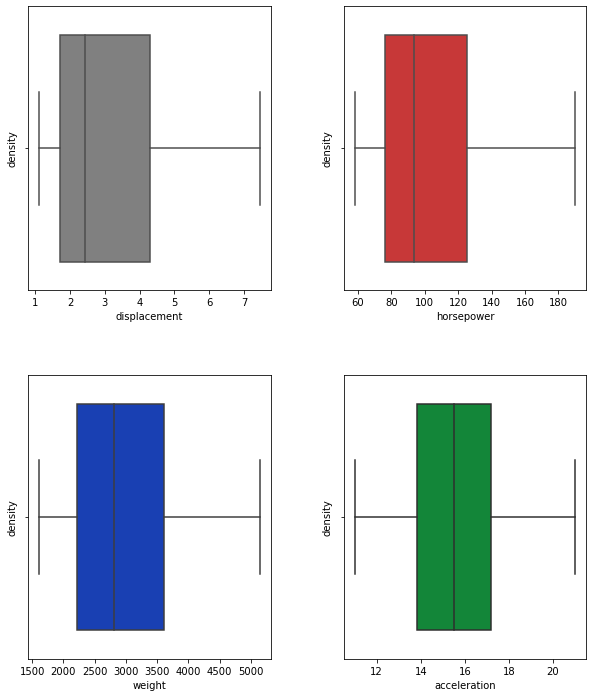

In [43]:
# Let's verify the outliers are actually gone
fig, axes = plt.subplots(2, 2, figsize=(10,12))
y_labeler(axes)
sns.boxplot(data.displacement, color='#808080', ax=axes[0,0])
sns.boxplot(data.horsepower, color='#df2020', ax=axes[0,1])
sns.boxplot(data.weight, color='#0033cc', ax=axes[1,0])
sns.boxplot(data.acceleration, color='#009933', ax=axes[1,1])
plt.subplots_adjust(wspace=.3, hspace=.3)

## 3.3 Encoding Categorical Features

-  Categorical variables are typically stored as text values which represent various traits. 

-  Some examples include <code>**color**</code> = {"Red", "Yellow", "Blue"), <code>**size**</code> =  ("Small", "Medium", "Large"), etc.

-  Many ML algorithms can support categorical values without further manipulation but there are many others that do not. 

-  Therefore, the analyst is faced with the challenge of figuring out how to turn these text attributes into **numerical values** for further processing.

## Approach 1: Label Encoding

-  Label encoding is simply converting each value in a column to a number. 

-  For example, the <code>**model_year**</code> column contains 13 different values. We could choose to encode it like this:

```python
70 --> 0
71 --> 1
72 --> 2
...
```

## Approach 2: One-Hot Encoding

-  Label encoding is straightforward but it has the disadvantage that numeric values can be "misinterpreted" by the learning algorithms. 

-  For example, the value of 0 is obviously less than the value of 4 but is that what we really aim for? For example, does a vehicle from 1974 have "4x" more weight than one from 1971?

-  A common alternative approach is called **one hot encoding**. Here, the basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. 

-  This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

In [44]:
# In pandas we can achieve easily one-hot encoding using the 'get_dummies()' function
categorical_features = ['cylinders', 'model_year', 'origin']
data_with_dummies = pd.get_dummies(data, columns = categorical_features)
data_with_dummies.head()

,displacement,horsepower,weight,acceleration,car_name,mpg,cylinders_3,cylinders_4,cylinders_5,cylinders_6,...,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82,origin_1,origin_2,origin_3
0,5.030829,130.0,3504.0,12.0,chevrolet chevelle malibu,18.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.735472,165.0,3693.0,11.5,buick skylark 320,15.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5.211086,150.0,3436.0,11.0,plymouth satellite,18.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4.981667,150.0,3433.0,12.0,amc rebel sst,16.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4.948893,140.0,3449.0,11.0,ford torino,17.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
# Just as a convention, I prefer to place the column to be predicted
# as the last one.
columns = data_with_dummies.columns.tolist()
# Popping out 'mpg' from the list and insert it back at the end.
columns.insert(len(columns), columns.pop(columns.index('mpg')))
# Let's refactor the DataFrame using this new column index
data_with_dummies = data_with_dummies.loc[:, columns]
data_with_dummies.head()

,displacement,horsepower,weight,acceleration,car_name,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,...,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82,origin_1,origin_2,origin_3,mpg
0,5.030829,130.0,3504.0,12.0,chevrolet chevelle malibu,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,18.0
1,5.735472,165.0,3693.0,11.5,buick skylark 320,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,15.0
2,5.211086,150.0,3436.0,11.0,plymouth satellite,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,18.0
3,4.981667,150.0,3433.0,12.0,amc rebel sst,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,16.0
4,4.948893,140.0,3449.0,11.0,ford torino,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,17.0


In [46]:
# The categorical variable 'car_name' contains a lot of different values.
# Using one-hot encoding might lead to a very sparse dataset, as we need
# to map a single column to 305 columns!
data_with_dummies.car_name.value_counts()

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: car_name, Length: 305, dtype: int64

In [47]:
"""
Three solutions can be designed to tackle with this issue:
1) Just drop the column 'car_name' (i.e., our model won't rely on that feature for prediction)
2) Use one-hot encoding scheme and deal with sparsity data (i.e., possibly leading to overfitting)
3) Trade-off: try to build another column which somehow reduces (i.e., cluster) similar values together
and then apply one-hot encoding.
Let's see how to perform 3)
"""
# Suppose we want to create another column called 'automaker_name', which simply contains
# the name of the automaker, disregarding the model.
# For example, automaker_name('ford gran torino') = automaker_name('ford f250') = 'ford'
data_with_dummies['automaker_name'] = data_with_dummies['car_name'].map(lambda x:
                                                                       x.split(' ')[0])
data_with_dummies.head()

,displacement,horsepower,weight,acceleration,car_name,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,...,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82,origin_1,origin_2,origin_3,mpg,automaker_name
0,5.030829,130.0,3504.0,12.0,chevrolet chevelle malibu,0,0,0,0,1,...,0,0,0,0,0,1,0,0,18.0,chevrolet
1,5.735472,165.0,3693.0,11.5,buick skylark 320,0,0,0,0,1,...,0,0,0,0,0,1,0,0,15.0,buick
2,5.211086,150.0,3436.0,11.0,plymouth satellite,0,0,0,0,1,...,0,0,0,0,0,1,0,0,18.0,plymouth
3,4.981667,150.0,3433.0,12.0,amc rebel sst,0,0,0,0,1,...,0,0,0,0,0,1,0,0,16.0,amc
4,4.948893,140.0,3449.0,11.0,ford torino,0,0,0,0,1,...,0,0,0,0,0,1,0,0,17.0,ford


In [48]:
data_with_dummies['car_name'].map(lambda x: x.split(' ')[0]).value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: car_name, dtype: int64

In [49]:
"""
Let's see how many distinct values we have now for this nvalue_countsrical variable
"""
data_with_dummies['automaker_name'].value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: automaker_name, dtype: int64

In [50]:
def sanitize_automaker_name(car_name):
    s = car_name.split(' ')[0]
    if s == 'vw' or s == 'vokswagen':
        return car_name.replace(s,'volkswagen')
    if s == 'chevroelt' or s == 'chevy':
        return car_name.replace(s,'chevrolet')
    if s == 'maxda':
        return car_name.replace(s,'mazda')
    if s == 'mercedes':
        return car_name.replace(s,'mercedes-benz')
    if s == 'toyouta':
        return car_name.replace(s,'toyota')
    return car_name

In [51]:
"""
Use the 'sanitize_automaker_name' function to update 'car_name' values.
"""
data_with_dummies['car_name'] = data_with_dummies['car_name'].map(lambda x:
                                                                 sanitize_automaker_name(x))
data_with_dummies.head()

,displacement,horsepower,weight,acceleration,car_name,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,...,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82,origin_1,origin_2,origin_3,mpg,automaker_name
0,5.030829,130.0,3504.0,12.0,chevrolet chevelle malibu,0,0,0,0,1,...,0,0,0,0,0,1,0,0,18.0,chevrolet
1,5.735472,165.0,3693.0,11.5,buick skylark 320,0,0,0,0,1,...,0,0,0,0,0,1,0,0,15.0,buick
2,5.211086,150.0,3436.0,11.0,plymouth satellite,0,0,0,0,1,...,0,0,0,0,0,1,0,0,18.0,plymouth
3,4.981667,150.0,3433.0,12.0,amc rebel sst,0,0,0,0,1,...,0,0,0,0,0,1,0,0,16.0,amc
4,4.948893,140.0,3449.0,11.0,ford torino,0,0,0,0,1,...,0,0,0,0,0,1,0,0,17.0,ford


In [52]:
"""
Re-apply the function on the sanitized version of 'car_name'.
"""
data_with_dummies['automaker_name'] = data_with_dummies['car_name'].map(lambda x: 
                                                                        x.split(' ')[0])
data_with_dummies.head()

,displacement,horsepower,weight,acceleration,car_name,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,...,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82,origin_1,origin_2,origin_3,mpg,automaker_name
0,5.030829,130.0,3504.0,12.0,chevrolet chevelle malibu,0,0,0,0,1,...,0,0,0,0,0,1,0,0,18.0,chevrolet
1,5.735472,165.0,3693.0,11.5,buick skylark 320,0,0,0,0,1,...,0,0,0,0,0,1,0,0,15.0,buick
2,5.211086,150.0,3436.0,11.0,plymouth satellite,0,0,0,0,1,...,0,0,0,0,0,1,0,0,18.0,plymouth
3,4.981667,150.0,3433.0,12.0,amc rebel sst,0,0,0,0,1,...,0,0,0,0,0,1,0,0,16.0,amc
4,4.948893,140.0,3449.0,11.0,ford torino,0,0,0,0,1,...,0,0,0,0,0,1,0,0,17.0,ford


In [53]:
"""
Let's see how many distinct values we have now for this new categorical variable.
"""
data_with_dummies['automaker_name'].value_counts()

ford             51
chevrolet        47
plymouth         31
amc              28
dodge            28
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
fiat              8
peugeot           8
audi              7
volvo             6
chrysler          6
renault           5
saab              4
opel              4
subaru            4
mercedes-benz     3
cadillac          2
bmw               2
capri             1
hi                1
triumph           1
nissan            1
Name: automaker_name, dtype: int64

In [54]:
# Create the set of the top-10 automakers
top_10_automakers = set(data_with_dummies['automaker_name'].value_counts().index[:10])
# Label with 'other' any automaker_name which is not in the list above
data_with_dummies['automaker_name'] = np.where(data_with_dummies.
                                               automaker_name.isin(top_10_automakers), 
                                              data_with_dummies.automaker_name,
                                              'other')

In [55]:
"""
Let's verify we did it right!
"""
data.loc[data_with_dummies.automaker_name == 'other', 'car_name'].map(lambda x: 
                                                                      x.split(' ')[0] not in top_10_automakers).all()

True

In [56]:
"""
We now categorize (i.e., discretize) 'automaker_name' using the 10 + 1 discrete values above.
"""
categorical_features = ['automaker_name']
data_with_dummies = pd.get_dummies(data_with_dummies, columns = categorical_features)
data_with_dummies.head()

,displacement,horsepower,weight,acceleration,car_name,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,...,automaker_name_buick,automaker_name_chevrolet,automaker_name_datsun,automaker_name_dodge,automaker_name_ford,automaker_name_other,automaker_name_plymouth,automaker_name_pontiac,automaker_name_toyota,automaker_name_volkswagen
0,5.030829,130.0,3504.0,12.0,chevrolet chevelle malibu,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,5.735472,165.0,3693.0,11.5,buick skylark 320,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,5.211086,150.0,3436.0,11.0,plymouth satellite,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4.981667,150.0,3433.0,12.0,amc rebel sst,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4.948893,140.0,3449.0,11.0,ford torino,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [57]:
# Just as a convention, I prefer to place the column to be predicted
# as the last one.
columns = data_with_dummies.columns.tolist()
# Popping out 'mpg' from the list and insert it back at the end.
columns.insert(len(columns), columns.pop(columns.index('mpg')))
# Popping out 'automaker_name_other' from the list and insert it after 'automaker_name_volkswagen'.
columns.insert(columns.index('automaker_name_volkswagen'), columns.pop(columns.index('automaker_name_other')))
# Popping out 'car_name' from the list and insert it right before 'mpg'
columns.insert(-1, columns.pop(columns.index('car_name')))
# Let's refactor the DataFrame using this new column index
data_with_dummies = data_with_dummies.loc[:, columns]
data_with_dummies.head()

,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model_year_70,...,automaker_name_datsun,automaker_name_dodge,automaker_name_ford,automaker_name_plymouth,automaker_name_pontiac,automaker_name_toyota,automaker_name_volkswagen,automaker_name_other,car_name,mpg
0,5.030829,130.0,3504.0,12.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,chevrolet chevelle malibu,18.0
1,5.735472,165.0,3693.0,11.5,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,buick skylark 320,15.0
2,5.211086,150.0,3436.0,11.0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,plymouth satellite,18.0
3,4.981667,150.0,3433.0,12.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,amc rebel sst,16.0
4,4.948893,140.0,3449.0,11.0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,ford torino,17.0


## 3.4 Standardize Feature Scale

-  Some learning models are sensitive to different feature scales appearing on the training dataset.

-  To overcome this issue, one typically standardize (i.e., normalize) the values of each continuous feature.

-  Two main strategies are usually enacted:
    -  **min-max** normalization
    -  **z-score** standardization

In [58]:
# Let's deep copy our DataFrame again
data_norm_0_1 = data_with_dummies.copy()

In [59]:
"""
The easiest way to normalize a (sub)set of features is as follows.
"""
# 1. Decide which list of features to standardize
features_to_standardize = ['displacement', 'horsepower', 'weight', 'acceleration']

# 2. Select those features (i.e., DataFrame columns) and apply, for example, min-max normalization
data_norm_0_1[features_to_standardize] = ((data_norm_0_1[features_to_standardize] - 
                                          data_norm_0_1[features_to_standardize].min()) 
                                          / (data_norm_0_1[features_to_standardize].max() - 
                                             data_norm_0_1[features_to_standardize].min()))
# 3. Verify the result
data_norm_0_1.head()

,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model_year_70,...,automaker_name_datsun,automaker_name_dodge,automaker_name_ford,automaker_name_plymouth,automaker_name_pontiac,automaker_name_toyota,automaker_name_volkswagen,automaker_name_other,car_name,mpg
0,0.617571,0.545455,0.536150,0.10,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,chevrolet chevelle malibu,18.0
1,0.728682,0.810606,0.589736,0.05,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,buick skylark 320,15.0
2,0.645995,0.696970,0.516870,0.00,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,plymouth satellite,18.0
3,0.609819,0.696970,0.516019,0.10,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,amc rebel sst,16.0
4,0.604651,0.621212,0.520556,0.00,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,ford torino,17.0


In [60]:
# Let's make another deep copy of our DataFrame
data_std = data_with_dummies.copy()

In [61]:
"""
The following three functions are used to standardize/normalize features.
"""
# 1. z_score computes the standard z-score of a feature value x
def z_score(x, mu_X, sigma_X):
    return (x - mu_X)/sigma_X

# 2. min_max computes the normalized value of a feature value x in the range [-1, 1]
def min_max(x, X_min, X_max):
    return (2*x - X_max - X_min)/(X_max - X_min)

# 3. min_max_0_1 computes the normalized value of a feature value x in the range [0, 1]
def min_max_0_1(x, X_min, X_max):
    return (x - X_min)/(X_max - X_min)

In [62]:
"""
We use 'map' to call the z_score function above element-wise
on each Series object: displacement, horsepower, weight, and acceleration.
"""
# 1.a. Compute the mean and std deviation of 'displacement'
mu_displacement = data_std.displacement.mean()
sigma_displacement = data_std.displacement.std()
# 1.b. Call the z_score function on the 'displacement' Series
data_std.displacement = data_std.displacement.map(lambda x: 
                                                  z_score(x, mu_displacement, 
                                                          sigma_displacement))

# 2.a. Compute the mean and std deviation of 'horsepower'
mu_horsepower = data_std.horsepower.mean()
sigma_horsepower = data_std.horsepower.std()
# 2.b. Call the z_score function on the 'horsepower' Series
data_std.horsepower = data_std.horsepower.map(lambda x: 
                                              z_score(x, mu_horsepower, 
                                                      sigma_horsepower))

# 3.a. Compute the mean and std deviation of 'weight'
mu_weight = data_std.weight.mean()
sigma_weight = data_std.weight.std()
# 3.b. Call the z_score function on the 'weight' Series
data_std.weight = data_std.weight.map(lambda x: 
                                      z_score(x, mu_weight, 
                                              sigma_weight))

# 4.a. Compute the mean and std deviation of 'acceleration'
mu_acceleration = data_std.acceleration.mean()
sigma_acceleration = data_std.acceleration.std()
# 4.b. Call the z_score function on the 'acceleration' Series
data_std.acceleration = data_std.acceleration.map(lambda x: 
                                                  z_score(x, mu_acceleration, 
                                                          sigma_acceleration))

data_std.head()

,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model_year_70,...,automaker_name_datsun,automaker_name_dodge,automaker_name_ford,automaker_name_plymouth,automaker_name_pontiac,automaker_name_toyota,automaker_name_volkswagen,automaker_name_other,car_name,mpg
0,1.089233,0.734730,0.630077,-1.400526,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,chevrolet chevelle malibu,18.0
1,1.501624,1.714793,0.853259,-1.596991,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,buick skylark 320,15.0
2,1.194728,1.294766,0.549778,-1.793456,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,plymouth satellite,18.0
3,1.060461,1.294766,0.546236,-1.400526,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,amc rebel sst,16.0
4,1.041280,1.014748,0.565130,-1.793456,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,ford torino,17.0


In [63]:
# Let's create yet another deep copy of our DataFrame
data_std_z = data_with_dummies.copy()

In [64]:
"""
This is an even more general solution for standardizing multiple features
in one shot, using customized "normalizing" functions.
"""
def standardized_continuous_features(dataset, feature_names, func=z_score):
    
    if func != z_score and func != min_max and func != min_max_0_1:
        func = z_score
            
    for feature in feature_names:
        print("Standardized feature \"{}\" using [{}] function".format(feature, func.__name__))
        if func == min_max or func == min_max_0_1:
            feature_min = dataset[feature].min()
            feature_max = dataset[feature].max()
            print("Min. = {}".format(feature_min))
            print("Max. = {}".format(feature_max))
            dataset[feature] = dataset[feature].map(lambda x: func(x, feature_min, feature_max))
        else:
            feature_mean = dataset[feature].mean()
            feature_std = dataset[feature].std()
            print("Mean = {}".format(feature_mean))
            print("Std. Deviation = {}".format(feature_std))
            dataset[feature] = dataset[feature].map(lambda x: func(x, feature_mean, feature_std))
    
    return dataset

In [65]:
"""
We call the function defined above on our deep copy, using the list of features
that needs to be standardized.
"""
data_std_z = standardized_continuous_features(data_std_z, features_to_standardize)
data_std_z.head()

Standardized feature "displacement" using [z_score] function
Mean = 3.169682264934676
Std. Deviation = 1.708676511381029
Standardized feature "horsepower" using [z_score] function
Mean = 103.76130653266331
Std. Deviation = 35.71200308064147
Standardized feature "weight" using [z_score] function
Mean = 2970.424623115578
Std. Deviation = 846.8417741973271
Standardized feature "acceleration" using [z_score] function
Mean = 15.564321608040187
Std. Deviation = 2.544987351982037


,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model_year_70,...,automaker_name_datsun,automaker_name_dodge,automaker_name_ford,automaker_name_plymouth,automaker_name_pontiac,automaker_name_toyota,automaker_name_volkswagen,automaker_name_other,car_name,mpg
0,1.089233,0.734730,0.630077,-1.400526,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,chevrolet chevelle malibu,18.0
1,1.501624,1.714793,0.853259,-1.596991,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,buick skylark 320,15.0
2,1.194728,1.294766,0.549778,-1.793456,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,plymouth satellite,18.0
3,1.060461,1.294766,0.546236,-1.400526,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,amc rebel sst,16.0
4,1.041280,1.014748,0.565130,-1.793456,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,ford torino,17.0


In [66]:
"""
Let's verify the two different approaches above lead to the same result."
"""
print((np.abs(data_std[features_to_standardize] - data_std_z[features_to_standardize]) < 0.0001).all())

displacement    True
horsepower      True
weight          True
acceleration    True
dtype: bool


In [67]:
"""
Standardization and min-max scaling can be also performed using scikit-learn.
"""
# The following is the scikit-learn package which provides
# various preprocessing capabilities
from sklearn import preprocessing

# Standardizing features using z-score
std_scale = preprocessing.StandardScaler().fit(data_with_dummies[features_to_standardize])
data_std = std_scale.transform(data_with_dummies[features_to_standardize])

# Normalizing features using min-max
minmax_scale = preprocessing.MinMaxScaler().fit(data_with_dummies[features_to_standardize])
data_minmax = minmax_scale.transform(data_with_dummies[features_to_standardize])

# NOTE: 'data_std' and 'data_minmax' are numpy's ndarray (i.e., not pandas' DataFrame) objects

## 3.5 Feature Selection

-  This is a topic that would require an in-depth analysis.

-  A very simple approach to select highly discriminant features is given by measuring how each feature correlated with the target, and pick the ones with the highest correlation score.

In [68]:
"""
Let's compute feature correlation between each feature and our target 'mpg'.
Pandas 'corr()' function when applied to a DataFrame returns the whole correlation matrix.
This is a diagonal matrix having all 1's on its diagonal, whilst the entry (i,j) will contain
the correlation coefficient between feature i and feature j (i != j).
"""
corr_matrix = data_with_dummies.corr()
strong_corr = corr_matrix[(corr_matrix['mpg'].abs() > .5) &
                         (corr_matrix['mpg'] != 1)].loc[:, 'mpg']

print("Strongest correlated features:\n{}".
      format(strong_corr.sort_values()))
print()
print("Strongest correlated features (absolute values):\n{}".
      format(strong_corr.abs().sort_values(ascending=False)))

Strongest correlated features:
weight         -0.831741
displacement   -0.804203
horsepower     -0.788402
cylinders_8    -0.647308
origin_1       -0.568192
cylinders_4     0.758259
Name: mpg, dtype: float64

Strongest correlated features (absolute values):
weight          0.831741
displacement    0.804203
horsepower      0.788402
cylinders_4     0.758259
cylinders_8     0.647308
origin_1        0.568192
Name: mpg, dtype: float64
